<a href="https://colab.research.google.com/github/marelycarcamo/Challenge1-Tiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Challenge 1. Tiendas.


## Importación de datos y creación de los dataframe base.

In [2]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib import colors as colors
from unidecode import unidecode
import sys

print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Matplotlib: {mpl.__version__}')
print(f'Python: {sys.version}')



Pandas: 2.2.2
Seaborn: 0.13.2
Matplotlib: 3.10.0
Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [4]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Iterar sobre los archivos csv para visualizar las columnas.

In [5]:
for df in [tienda1, tienda2, tienda3, tienda4]:
    print(df.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [6]:
# Creamos una columna 'Tienda', para el identificador de tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenamos las tiendas en un único dataframe.
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [7]:
# Podemos ver información general del dataset: nombre de las columnas, conteo de datos no nulos, tipo de datos, conteo por tipo de datos.
df_tiendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [8]:
df_tiendas.shape  #El dataset tiene 9435 filas y 13 columnas.
print(f'El dataset tiene {df_tiendas.shape[0]} filas y {df_tiendas.shape[1]} columnas.')

El dataset tiene 9435 filas y 13 columnas.


In [9]:
# Muestra un resumen estadístico con los datos numéricos: conteo, promedio, STD, dato mínimo, dato máximo, etc.
df_tiendas.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


In [10]:
# Eliminando los acentos y reemplazando nombres de columnas.
def limpiar_columnas(df):
    # Convertir las columnas a pandas.Index después de procesarlas
    df.columns = pd.Index([unidecode(col).lower().replace(" ", "_") for col in df.columns])
    df.columns = df.columns.str.replace('_de_', '_', regex=False)\
                           .str.replace('_del_', '_', regex=False)\
                           .str.replace('lat', 'latitud', regex=False)\
                           .str.replace('lon', 'longitud', regex=False)
    return

limpiar_columnas(df_tiendas)
df_tiendas.columns

Index(['producto', 'categoria_producto', 'precio', 'costo_envio',
       'fecha_compra', 'vendedor', 'lugar_compra', 'calificacion',
       'metodo_pago', 'cantidad_cuotas', 'latitud', 'longitud', 'tienda'],
      dtype='object')

In [11]:
# Normalización para reducir inconsistencias. Eliminamos espacios en blanco y estardarizar uso de mayúsculas y minúsculas


textos_lower = ['producto', 'categoria_producto','metodo_pago','tienda']
textos_title = ['vendedor', 'lugar_compra']


def normalizar_texto(df, columnas_lower=[], columnas_title=[]):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()
    for col in columnas_lower:
        df[col] = df[col].str.lower()
    for col in columnas_title:
        df[col] = df[col].str.title()
    return df



df_tiendas = normalizar_texto(df_tiendas, columnas_lower=textos_lower, columnas_title=textos_title)


df_tiendas.head()

,producto,categoria_producto,precio,costo_envio,fecha_compra,vendedor,lugar_compra,calificacion,metodo_pago,cantidad_cuotas,latitud,longitud,tienda
0,asistente virtual,electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,tarjeta de crédito,8,4.60971,-74.08175,tienda 1
1,mesa de comedor,muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,tarjeta de crédito,4,6.25184,-75.56359,tienda 1
2,juego de mesa,juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,tarjeta de crédito,1,10.39972,-75.51444,tienda 1
3,microondas,electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,nequi,1,3.43722,-76.52250,tienda 1
4,silla de oficina,muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,nequi,1,6.25184,-75.56359,tienda 1


In [12]:
# Especificando tipo de datos para datos object
df_tiendas['fecha_compra'] = pd.to_datetime(df_tiendas['fecha_compra'],dayfirst=True)
categoricas = ['producto', 'categoria_producto', 'vendedor', 'lugar_compra', 'metodo_pago','tienda']


for col in categoricas:
    df_tiendas[col] = df_tiendas[col].astype('category')

df_tiendas.dtypes

,0
producto,category
categoria_producto,category
precio,float64
costo_envio,float64
fecha_compra,datetime64[ns]
vendedor,category
lugar_compra,category
calificacion,int64
metodo_pago,category
cantidad_cuotas,int64


In [13]:
#Verificar si hay duplicados
print(f'En el dataframe df_tiendas hay ', df_tiendas.duplicated().sum(), 'duplicados')

En el dataframe df_tiendas hay  0 duplicados


In [14]:
# Verificar si hay valores nulos
df_tiendas.isnull().sum()  # No hay valores nulos
df_tiendas_nulos = df_tiendas.isnull().sum()
df_tiendas_nulos.to_frame()

# Poner nombre a las columnas de df_tiendas_nulos
df_tiendas_nulos.columns = 'valores_nulos'
df_tiendas_nulos


,0
producto,0
categoria_producto,0
precio,0
costo_envio,0
fecha_compra,0
vendedor,0
lugar_compra,0
calificacion,0
metodo_pago,0
cantidad_cuotas,0


In [15]:
# Explorar los productos disponibles por categoría

df_tiendas.groupby(['categoria_producto'],observed=True).size()

#Total categorias
df_tiendas['categoria_producto'].nunique()

#Total de productos
df_tiendas['producto'].nunique()

print(f'Total de categorías: {df_tiendas["categoria_producto"].nunique()}')
print(f'Total de productos: {df_tiendas["producto"].nunique()}')

Total de categorías: 8
Total de productos: 51


In [16]:
# Explorar las ventas realizadas por los vendedores en cada tienda
print(f'Total de vendedores: {df_tiendas["vendedor"].nunique()}')
df_tiendas.groupby(['vendedor','tienda'],observed=True).size().unstack()

Total de vendedores: 14


tienda,tienda 1,tienda 2,tienda 3,tienda 4
vendedor,,,,
Beatriz Morales,165,170,158,157
Blanca Ramirez,180,166,163,170
Camila Rivera,167,161,173,166
Felipe Santos,170,166,169,196
Izabela De León,197,195,171,181
Juan Fernandez,163,163,184,184
Juliana Costa,169,179,165,164
Lucas Olivera,166,169,166,173
Maria Alfonso,173,170,186,150


In [17]:
# Mostrar la distribución de las distintas formas de pago de las tiendas
print(f'Total de formas de pago: {df_tiendas["metodo_pago"].nunique()}')
df_tiendas['metodo_pago'].value_counts()

Total de formas de pago: 4


,count
metodo_pago,
tarjeta de crédito,6898
nequi,1900
cupón,504
tarjeta de débito,133


#1. Análisis de facturación



In [18]:
# Cambiamos la configuración de Panda para tener los resultados con formato estándar.
pd.set_option('display.float_format', ' |  {:,.0f}'.format)


# En este primer análisis, calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
# Suponemos que ya hiciste esto:
df_facturacion = df_tiendas.groupby('tienda', observed=True)['precio'].sum().reset_index()

df_facturacion

,tienda,precio
0,tienda 1,"| 1,150,880,400"
1,tienda 2,"| 1,116,343,500"
2,tienda 3,"| 1,098,019,600"
3,tienda 4,"| 1,038,375,700"


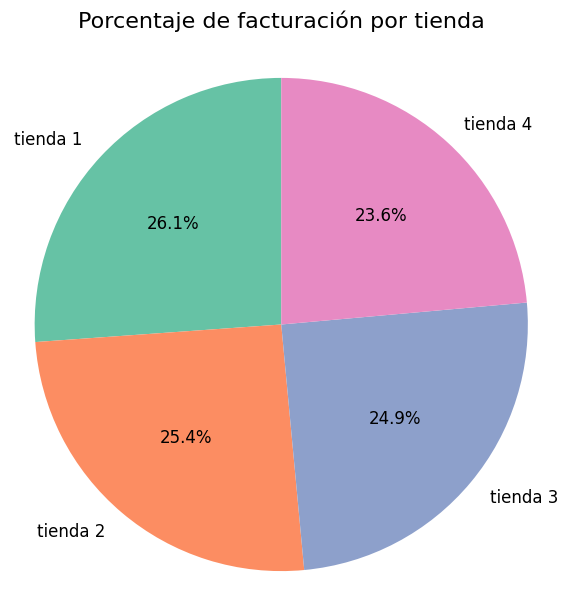

In [19]:
# Datos
labels = df_facturacion['tienda'].to_list()
sizes = df_facturacion['precio']

# Colores suaves (opcional)
colores = plt.cm.Set2.colors # type: ignore[override]

# Gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   # porcentaje con 1 decimal
    startangle=90,
    colors=colores,
    textprops={'fontsize': 12}
)

# Título y formato
plt.title('Porcentaje de facturación por tienda', fontsize=16, pad=20)
plt.axis('equal')  # Mantiene forma circular

plt.show()

# 2. Ventas por categoría

In [20]:
# Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

df_categorias = df_tiendas.groupby(['tienda', 'categoria_producto'],observed=True)['categoria_producto'].count().unstack()

df_categorias



categoria_producto,artículos para el hogar,deportes y diversión,electrodomésticos,electrónicos,instrumentos musicales,juguetes,libros,muebles
tienda,,,,,,,,
tienda 1,171,284,312,448,182,324,173,465
tienda 2,181,275,305,422,224,313,197,442
tienda 3,177,277,278,451,177,315,185,499
tienda 4,201,277,254,451,170,338,187,480


In [21]:
# Con el dataframe df_categorias, obtener: tienda, la categoría con la máxima cantidad y el monto máximo asociado
df_categorias_max = df_categorias.idxmax(axis=1).reset_index()
df_categorias_max

,tienda,0
0,tienda 1,muebles
1,tienda 2,muebles
2,tienda 3,muebles
3,tienda 4,muebles


# 3. Calificación promedio de la tienda


In [22]:
#calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

df_calificacion = df_tiendas.groupby('tienda',observed=True)['calificacion'].mean().reset_index()

df_calificacion

,tienda,calificacion
0,tienda 1,| 4
1,tienda 2,| 4
2,tienda 3,| 4
3,tienda 4,| 4


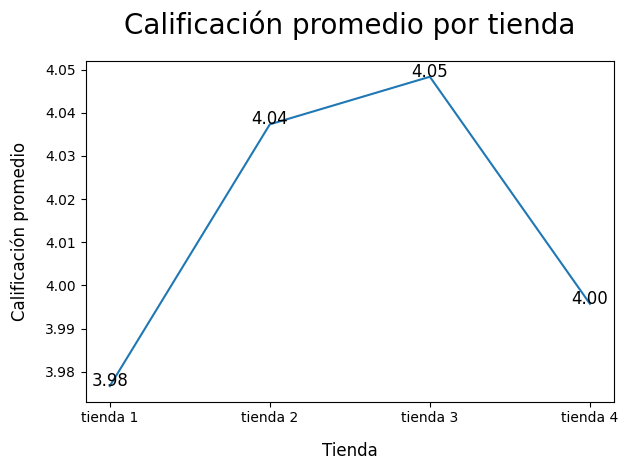

In [23]:
# Crea gráfico de línea con seaborn
sns.lineplot(data=df_calificacion, x='tienda', y='calificacion')

# Mostrar valores encima de cada barra
for i, valor in enumerate(df_calificacion['calificacion']):
    plt.text(i, valor , str(f'{valor:.2f}'), ha='center', fontsize=12)

# Títulos y estilos
plt.title('Calificación promedio por tienda', fontsize=20, pad=20)
plt.ylabel('Calificación promedio',fontsize=12,labelpad=12)
plt.xlabel('Tienda',fontsize=12,labelpad=12)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [34]:
df_top = df_tiendas.groupby(['tienda', 'producto'], observed=True).size()\
                  .sort_values(ascending=False)\
                  .groupby(level=0).head(1).to_frame()

df_top

#.groupby(level=0).head(1): Este es un paso crucial. Reagrupa los datos por el primer nivel del índice jerárquico (que es tienda) y luego selecciona solo el primer registro dentro de cada grupo de tienda. Esto efectivamente aísla el producto más vendido para cada tienda.

,,0
tienda,producto,
tienda 2,iniciando en programación,65
tienda 4,cama box,62
tienda 1,tv led uhd 4k,60
tienda 3,kit de bancas,57


In [33]:
df_bottom = df_tiendas.groupby(['tienda','producto',], observed=True).size()\
                     .sort_values(ascending=True)\
                     .groupby(level=0).head(1).to_frame()

df_bottom

,,0
tienda,producto,
tienda 2,juego de mesa,32
tienda 1,auriculares con micrófono,33
tienda 4,guitarra eléctrica,33
tienda 3,bloques de construcción,35


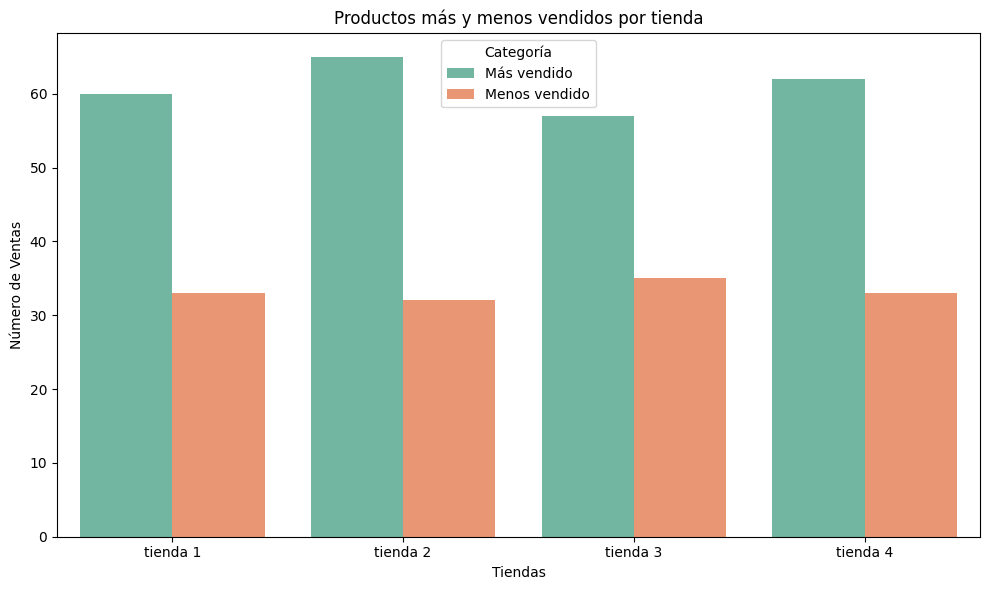

In [28]:
# Crear un DataFrame combinado (similar al que se hizo con pandas)

# Renombrar columnas del DataFrame df_top
df_top_renamed = df_top.rename(columns={0: 'Más vendido'})

# Renombrar columnas del DataFrame df_bottom
df_bottom_renamed = df_bottom.rename(columns={0: 'Menos vendido'})

# Combinar los dos DataFrames
df_combined = pd.concat([df_top_renamed, df_bottom_renamed], axis=1)

# Restablecer el índice
df_combined = df_combined.reset_index()


# Transformar el DataFrame para que sea más fácil usarlo en seaborn

df_melted = df_combined.melt(id_vars='tienda', value_vars=['Más vendido','Menos vendido'],var_name='Categoría', value_name='Número de Ventas')

# Crear el gráfico apilado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted,
            x='tienda',
            y='Número de Ventas',
            hue='Categoría',
            palette='Set2',
            estimator=sum) # type: ignore[override]

plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Número de Ventas')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

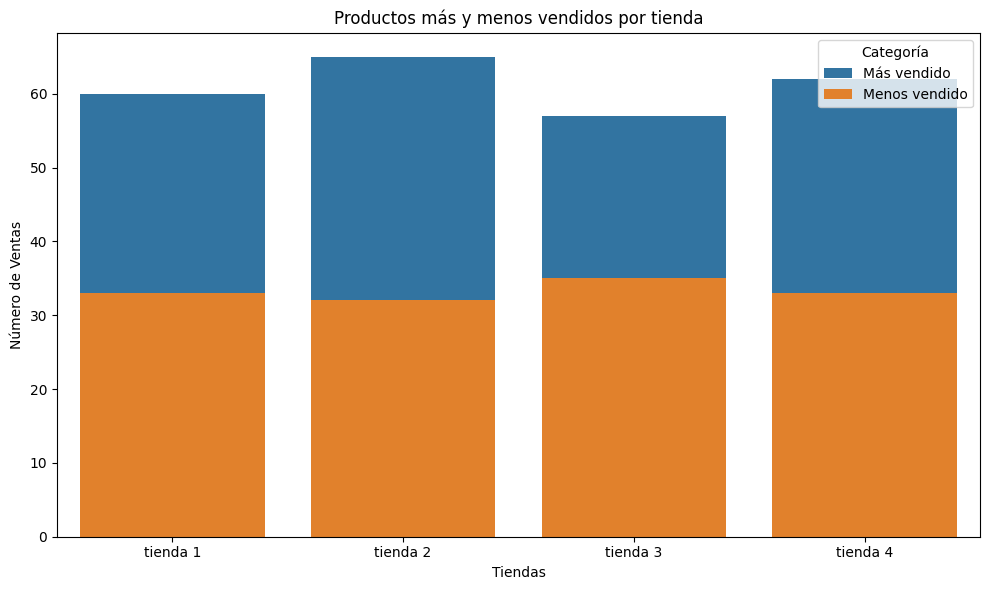

In [31]:
# Combinar los DataFrames
df_combined = pd.concat([
    df_top.rename(columns={0: 'Más vendido'}),
    df_bottom.rename(columns={0: 'Menos vendido'})
], axis=1).reset_index()

# Transformar el DataFrame a formato largo (melt)
df_melted = df_combined.melt(
    id_vars='tienda',  # La columna que queremos mantener como identificador
    value_vars=['Más vendido', 'Menos vendido'],  # Las columnas que se apilan
    var_name='Categoría',  # Nombre de la nueva columna para las categorías
    value_name='Número de Ventas'  # Nombre para los valores apilados
)

# Crear el gráfico con seaborn
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_melted,
    x='tienda',
    y='Número de Ventas',
    hue='Categoría',  # Diferencia las categorías con colores
    estimator=sum,  # type: ignore[override] # Usa la suma como valor para la barra
    dodge=False  # type: ignore[override] # Ajusta las barras para que estén apiladas  # type: ignore[override]
)

# Personalización del gráfico
plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Número de Ventas')
plt.legend(title='Categoría')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 5. Envío promedio por tienda

In [ ]:
df_envio_promedio = df_tiendas.groupby('tienda',observed=True)['costo_envio'].mean().reset_index()

x = df_envio_promedio['tienda']
y = df_envio_promedio['costo_envio']

df_envio_promedio


,tienda,costo_envio
0,tienda 1,"| 26,019"
1,tienda 2,"| 25,216"
2,tienda 3,"| 24,806"
3,tienda 4,"| 23,459"


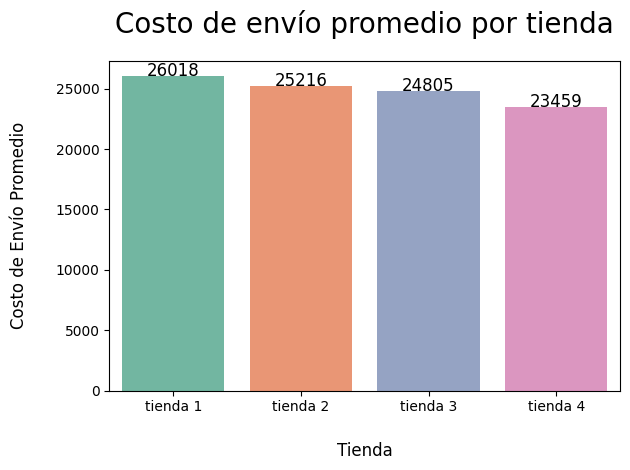

In [ ]:
sns.barplot(data=df_envio_promedio, x='tienda', y='costo_envio',palette='Set2')

# Agregar etiquetas con 1 decimal
#
plt.title('Costo de envío promedio por tienda',fontsize=20, pad=20)
plt.xlabel('Tienda')
plt.xlabel('Tienda',fontsize=12,labelpad=20)
plt.ylabel('Costo de Envío Promedio',fontsize=12, labelpad=20)

# Mostrar valores encima de cada barra
for i, valor in enumerate(df_envio_promedio['costo_envio']):
    plt.text(i, valor +2.5 , str(int(valor)), ha='center', fontsize=12)

# Ajustar márgenes
plt.tight_layout()
plt.show()

##################################################